# 데이터 셋 및 필요 모듈 로딩

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 챌린처 랭크에서 15분 게임데이터 셋을 불러옵니다.
lol = pd.read_csv("C:/Users/wkdgu/파이썬을 활용한 데이터 분석-학교수업/팀플/Challenger_Ranked_Games_15minute.csv")
lol

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,4247263043,0,24081,1190,44,8.8,309,74,0,8,...,['MID_LANE'],2,1,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1
1,4247155821,1,24162,2212,46,9.2,393,64,0,5,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
2,4243963257,0,22413,1563,41,8.2,300,62,0,5,...,['BOT_LANE'],4,2,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1
3,4241678498,0,23837,3197,46,9.2,370,96,0,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
4,4241538868,1,27688,3663,44,8.8,381,66,0,9,...,['BOT_LANE'],2,1,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26829,4143231833,0,26110,1535,46,9.2,289,73,0,15,...,['BOT_LANE'],1,0,0,1,0,1,['WATER_DRAGON'],1,1
26830,4157911901,0,57503,3293,62,12.4,329,28,0,27,...,[],6,2,1,3,1,0,[],0,0
26831,3764171638,0,26091,2986,47,9.4,338,86,0,7,...,[],0,0,0,0,0,0,[],0,0
26832,4110201724,1,24734,4289,45,9.0,328,64,0,11,...,['BOT_LANE'],1,0,0,1,0,0,['AIR_DRAGON'],1,0


# Feature Engineering

## gameId칼럼 제거

In [3]:
# gameId 칼럼을 제거해 줍니다.
lol.drop("gameId", axis=1, inplace = True)
lol

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,0,24081,1190,44,8.8,309,74,0,8,14,...,['MID_LANE'],2,1,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1
1,1,24162,2212,46,9.2,393,64,0,5,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
2,0,22413,1563,41,8.2,300,62,0,5,20,...,['BOT_LANE'],4,2,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1
3,0,23837,3197,46,9.2,370,96,0,6,13,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
4,1,27688,3663,44,8.8,381,66,0,9,10,...,['BOT_LANE'],2,1,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,['BOT_LANE'],1,0,0,1,0,1,['WATER_DRAGON'],1,1
26830,0,57503,3293,62,12.4,329,28,0,27,37,...,[],6,2,1,3,1,0,[],0,0
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,[],0,0,0,0,0,0,[],0,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,['BOT_LANE'],1,0,0,1,0,0,['AIR_DRAGON'],1,0


##  블루팀 총합 레벨이 20이하, 60이상은 데이터에서 삭제해줍니다.

In [4]:
# 데이터에서 블루팀 팀총합 레벨이 30이하, 60이상인 게임은 제거해서 lol에 담아줍니다.
lol = lol[(lol["blueTotalLevel"] > 30) & (lol["blueTotalLevel"] < 60)]
lol

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,0,24081,1190,44,8.8,309,74,0,8,14,...,['MID_LANE'],2,1,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1
1,1,24162,2212,46,9.2,393,64,0,5,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
2,0,22413,1563,41,8.2,300,62,0,5,20,...,['BOT_LANE'],4,2,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1
3,0,23837,3197,46,9.2,370,96,0,6,13,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
4,1,27688,3663,44,8.8,381,66,0,9,10,...,['BOT_LANE'],2,1,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,[],0,0,0,0,0,0,[],0,1
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,['BOT_LANE'],1,0,0,1,0,1,['WATER_DRAGON'],1,1
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,[],0,0,0,0,0,0,[],0,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,['BOT_LANE'],1,0,0,1,0,0,['AIR_DRAGON'],1,0


## 블루팀이 용을 3번 먹은 row는 1개이므로 EDA의 편의를 위해 제거해줍니다.

In [5]:
lol = lol[lol['blueDragon'] < 3]
lol

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,0,24081,1190,44,8.8,309,74,0,8,14,...,['MID_LANE'],2,1,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1
1,1,24162,2212,46,9.2,393,64,0,5,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
2,0,22413,1563,41,8.2,300,62,0,5,20,...,['BOT_LANE'],4,2,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1
3,0,23837,3197,46,9.2,370,96,0,6,13,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
4,1,27688,3663,44,8.8,381,66,0,9,10,...,['BOT_LANE'],2,1,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,[],0,0,0,0,0,0,[],0,1
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,['BOT_LANE'],1,0,0,1,0,1,['WATER_DRAGON'],1,1
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,[],0,0,0,0,0,0,[],0,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,['BOT_LANE'],1,0,0,1,0,0,['AIR_DRAGON'],1,0


In [6]:
lol['blueDragon'].value_counts()

0    11027
1     9311
2     3833
Name: blueDragon, dtype: int64

## 블루팀이 와드를 1506개 설치한 row는 제거해줍니다.

In [7]:
# 인덱스는  초반 15분에서 와드를 설치한 개수
# 값은 게임 초반 15분에서 인덱스 값만큼 와드를 설치한 게임의 판수
lol['blueWardPlaced'].value_counts().sort_index().tail(30)

216     1
221     1
223     1
224     2
227     1
230     1
233     1
234     1
236     3
238     1
240     1
241     1
242     1
245     2
246     1
251     2
257     1
262     2
266     1
267     2
269     1
276     1
277     1
291     1
295     1
304     1
316     1
349     2
355     1
1506    1
Name: blueWardPlaced, dtype: int64

In [8]:
lol = lol[lol['blueWardPlaced'] < 1500]
lol

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,0,24081,1190,44,8.8,309,74,0,8,14,...,['MID_LANE'],2,1,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1
1,1,24162,2212,46,9.2,393,64,0,5,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
2,0,22413,1563,41,8.2,300,62,0,5,20,...,['BOT_LANE'],4,2,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1
3,0,23837,3197,46,9.2,370,96,0,6,13,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
4,1,27688,3663,44,8.8,381,66,0,9,10,...,['BOT_LANE'],2,1,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,[],0,0,0,0,0,0,[],0,1
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,['BOT_LANE'],1,0,0,1,0,1,['WATER_DRAGON'],1,1
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,[],0,0,0,0,0,0,[],0,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,['BOT_LANE'],1,0,0,1,0,0,['AIR_DRAGON'],1,0


In [9]:
lol['blueWardPlaced'].value_counts().sort_index().tail(10)

267    2
269    1
276    1
277    1
291    1
295    1
304    1
316    1
349    2
355    1
Name: blueWardPlaced, dtype: int64

## blueWins 칼럼 0,1을 str으로 표현한 str_blueWins을 만듭니다.

In [10]:
lol[['blueWins']].head(10)

,blueWins
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,1
9,1


In [11]:
lol['str_blueWins'] = lol['blueWins'].map({0:'lose', 1:'win'}) 
lol[['str_blueWins', 'blueWins']]

,str_blueWins,blueWins
0,lose,0
1,win,1
2,lose,0
3,lose,0
4,win,1
...,...,...
26828,win,1
26829,lose,0
26831,lose,0
26832,win,1


## 블루팀이 첫 용을 먹었는지 string으로 표현하는 str_blueFirstDragon 칼럼을 생성합니다.

In [12]:
lol['str_blueFirstDragon'] = lol['blueFirstDragon'].map({0:'not_FirstDragon', 1:'FirstDragon'}) 
lol[['str_blueFirstDragon', 'blueFirstDragon']].head(10)

,str_blueFirstDragon,blueFirstDragon
0,not_FirstDragon,0
1,not_FirstDragon,0
2,not_FirstDragon,0
3,FirstDragon,1
4,FirstDragon,1
5,not_FirstDragon,0
6,not_FirstDragon,0
7,not_FirstDragon,0
8,not_FirstDragon,0
9,FirstDragon,1


## blueFirstTowerLane의 ['BOT_LANE']을 bot으로 바꿔줍니다.

In [13]:
# 이름을 바꿔줍니다.
lol['blueFirstTowerLane'].replace(["['BOT_LANE']","['TOP_LANE']", "['MID_LANE']"],['bot', 'mid', 'top'], inplace = True)
lol['blueFirstTowerLane']

0         []
1         []
2         []
3         []
4         []
        ... 
26828    bot
26829     []
26831    mid
26832     []
26833    mid
Name: blueFirstTowerLane, Length: 24170, dtype: object

## 블루팀과 레드팀이 정령을 먹은 횟수를 합친 'TotalRiftHeralds' 칼럼을 추가합니다.

In [14]:
lol['TotalRiftHeralds'] = (lol['blueRiftHeralds'] + lol['redRiftHeralds'])
lol[['blueRiftHeralds', 'redRiftHeralds', 'TotalRiftHeralds']]

,blueRiftHeralds,redRiftHeralds,TotalRiftHeralds
0,0,1,1
1,1,0,1
2,0,1,1
3,0,1,1
4,1,0,1
...,...,...,...
26828,0,1,1
26829,0,1,1
26831,0,0,0
26832,0,0,0


# 데이터 셋 기초 통계량

In [15]:
lol.describe()

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redFirstInhibitor,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragon,redRiftHeralds,TotalRiftHeralds
count,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.0,24170.000000,24170.000000,...,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000
mean,0.500248,26845.398180,3380.998552,46.065908,9.213182,348.015101,78.053951,0.0,11.298759,11.300786,...,0.022094,1.226520,0.342408,0.425031,0.459082,0.024328,0.541001,0.853289,0.358875,0.861605
std,0.500010,3379.895234,1464.201321,2.652584,0.530517,44.570353,16.959963,0.0,5.341689,5.495940,...,0.146991,1.266258,0.725126,0.583067,0.571215,0.166211,0.498326,0.740302,0.481660,0.356870
min,0.000000,14418.000000,-4756.000000,31.000000,6.200000,12.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24674.000000,2340.000000,45.000000,9.000000,327.000000,68.000000,0.0,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,26548.000000,3158.000000,46.000000,9.200000,353.000000,78.000000,0.0,11.000000,11.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,28694.000000,4174.000000,48.000000,9.600000,376.000000,88.000000,0.0,14.000000,14.000000,...,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,68133.000000,16905.000000,59.000000,11.800000,463.000000,177.000000,0.0,64.000000,85.000000,...,1.000000,11.000000,5.000000,4.000000,4.000000,3.000000,1.000000,3.000000,2.000000,2.000000


In [ ]:
numeric_columns = ['blueTotalGolds', 'blueAvgLevel', 'blueTotalMinionKills',
                  'blueTotalJungleMinionKills', 'blueKill', 'blueDeath', 'blueAssist',
                  'blueWardPlaced', ]

# 용 데이터
* 용의 최초 생성 시간은 게임 시작 후 5분이다. 
* 처치 후 부활시간은 5분이다.
* 한쪽 팀이 용을 4마리를 처치했을 때 다음 용으로 장로 용이 출현한다.

## 블루팀이 용 먹은 횟수

In [9]:
lol['blueDragon'].value_counts()

0    11027
1     9311
2     3833
3        1
Name: blueDragon, dtype: int64

## 레드팀이 용 먹은 횟수

In [10]:
lol['redDragon'].value_counts()

1    10425
0     8651
2     5089
3        7
Name: redDragon, dtype: int64

## 블루팀이 첫 용을 먹었을 때 승리 확률

Text(0.42499999999999716, 0.5, 'blueWins')

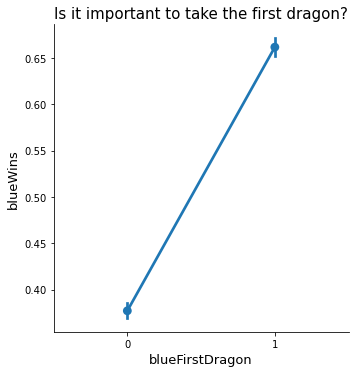

In [333]:
sns.factorplot(x = 'blueFirstDragon', y = 'blueWins', data = lol)
plt.title("Is it important to take the first dragon?", fontsize = 15)
plt.xlabel('blueFirstDragon', fontsize= 13)
plt.ylabel('blueWins', fontsize= 13)


# plt.savefig('blue_dragon.jpg')

## 레드팀이 용 먹은 횟수에 따른 승률 변화

Text(6.799999999999997, 0.5, 'redWins')

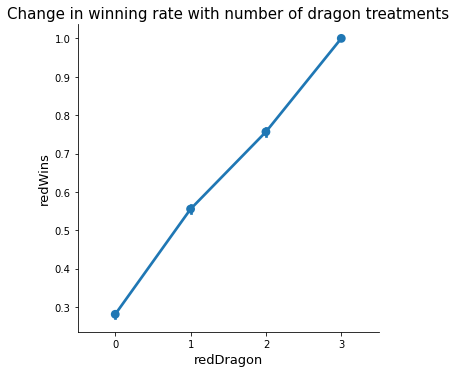

In [336]:
sns.factorplot(x = 'redDragon', y = 'redWins', data = lol)
plt.title("Change in winning rate with number of dragon treatments", fontsize = 15)
plt.xlabel('redDragon', fontsize= 13)
plt.ylabel('redWins', fontsize= 13)

# plt.savefig('red_dragon.jpg')

In [20]:
# 용을 3번 먹어으면 무조건 이긴다.
pd.crosstab(lol['redDragon'], lol['redWins'])

redWins,0,1
redDragon,,
0,6219,2432
1,4635,5790
2,1239,3850
3,0,7


## 레드팀 용 개수와 블루팀 용 개수 간의 상관관계

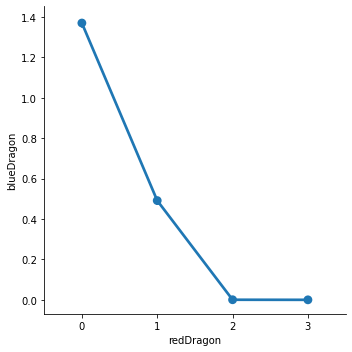

In [22]:
# 레드팀 용 개수와 블루팀 용 개수간에는 강한 반비례관계가 보임
sns.factorplot(x = 'redDragon', y = 'blueDragon', data = lol)

## 레드팀 용 개수와 블루팀 정령 간의 상관관계

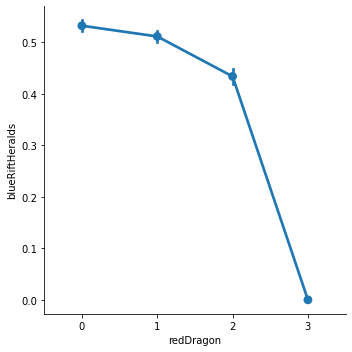

In [24]:
sns.factorplot(x = 'redDragon', y = 'blueRiftHeralds', data = lol)

## 레드팀 정령 개수와 블루팀 정령 개수 간의 상관관계

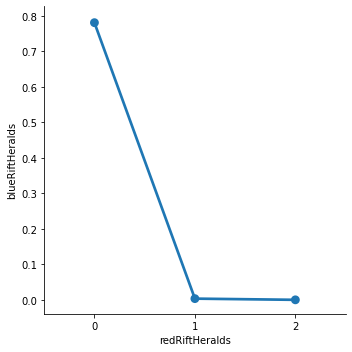

In [25]:
sns.factorplot(x = 'redRiftHeralds', y = 'blueRiftHeralds', data = lol)

## 블루팀 용 개수와 블루팀 탑 타워 철거개수간의 상관관계

In [42]:
lol['blueDragon'].value_counts()

0    11027
1     9311
2     3833
Name: blueDragon, dtype: int64

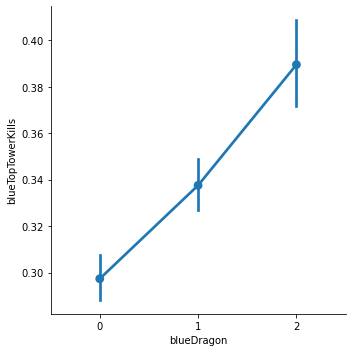

In [44]:
# 탑이 용싸움에 합류할 때 용을 먹을 수 있는 확률이 커진다고 생각합니다.
# 탑이 용싸움에 합류하면 그만큼 탑라인은 비워집니다.
# 그래서 블루팀의 드래곤 섭취 횟수와 탑 타워 철거 개수간에는 음의 상관관계가 있다고 가정합니다.

sns.factorplot(x = 'blueDragon', y = 'blueTopTowerKills', data = lol)

# EDA 결과 위의 가정을 틀렸습니다.
# 블루팀 용 섭취 횟수와 블루팀 탑 타워 철거 개수 간에는 양의 상관관계가 존재합니다.

# 정령 데이터
* 정령은 게임 시작후 8분 뒤에 등장
* 처치 후 6분 후에 재생성

## 블루팀이 정령먹은 횟수

In [11]:
lol['blueRiftHeralds'].value_counts()

0    12067
1    12059
2       46
Name: blueRiftHeralds, dtype: int64

## 레드팀이 정령 먹은 횟수

In [12]:
lol['redRiftHeralds'].value_counts()

0    15521
1     8628
2       23
Name: redRiftHeralds, dtype: int64

## 둘 다 정령을 못 먹거나 블루팀만 정령을 먹었을 때 승리 확률 비교

In [224]:
lol['TotalRiftHeralds'].value_counts()

1    20629
0     3443
2       98
Name: TotalRiftHeralds, dtype: int64

In [225]:
lol[['blueRiftHeralds', 'redRiftHeralds', 'TotalRiftHeralds']]

,blueRiftHeralds,redRiftHeralds,TotalRiftHeralds
0,0,1,1
1,1,0,1
2,0,1,1
3,0,1,1
4,1,0,1
...,...,...,...
26828,0,1,1
26829,0,1,1
26831,0,0,0
26832,0,0,0


In [241]:
lol[lol['TotalRiftHeralds'] <= 1]

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,str_blueWins,str_blueFirstDragon,TotalRiftHeralds
0,0,24081,1190,44,8.8,309,74,0,8,14,...,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1,lose,not_FirstDragon,1
1,1,24162,2212,46,9.2,393,64,0,5,6,...,1,0,0,0,[],0,0,win,not_FirstDragon,1
2,0,22413,1563,41,8.2,300,62,0,5,20,...,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1,lose,not_FirstDragon,1
3,0,23837,3197,46,9.2,370,96,0,6,13,...,1,0,0,0,[],0,1,lose,FirstDragon,1
4,1,27688,3663,44,8.8,381,66,0,9,10,...,0,1,0,0,[],0,0,win,FirstDragon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,0,0,0,0,[],0,1,win,FirstDragon,1
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,0,1,0,1,['WATER_DRAGON'],1,1,lose,not_FirstDragon,1
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,0,0,0,0,[],0,0,lose,not_FirstDragon,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,0,1,0,0,['AIR_DRAGON'],1,0,win,FirstDragon,0


In [240]:
lol[lol['TotalRiftHeralds'] <= 1]['TotalRiftHeralds'].value_counts()

1    20629
0     3443
Name: TotalRiftHeralds, dtype: int64

In [242]:
# 양팀 총합 정령을 먹은 회수가 1회 이하인 데이터를 모아놓은 lol_RiftHeralds_1를 만듭니다.
lol_RiftHeralds_1 = lol[lol['TotalRiftHeralds'] <= 1]
lol_RiftHeralds_1

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,str_blueWins,str_blueFirstDragon,TotalRiftHeralds
0,0,24081,1190,44,8.8,309,74,0,8,14,...,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1,lose,not_FirstDragon,1
1,1,24162,2212,46,9.2,393,64,0,5,6,...,1,0,0,0,[],0,0,win,not_FirstDragon,1
2,0,22413,1563,41,8.2,300,62,0,5,20,...,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1,lose,not_FirstDragon,1
3,0,23837,3197,46,9.2,370,96,0,6,13,...,1,0,0,0,[],0,1,lose,FirstDragon,1
4,1,27688,3663,44,8.8,381,66,0,9,10,...,0,1,0,0,[],0,0,win,FirstDragon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,0,0,0,0,[],0,1,win,FirstDragon,1
26829,0,26110,1535,46,9.2,289,73,0,15,14,...,0,1,0,1,['WATER_DRAGON'],1,1,lose,not_FirstDragon,1
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,0,0,0,0,[],0,0,lose,not_FirstDragon,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,0,1,0,0,['AIR_DRAGON'],1,0,win,FirstDragon,0


In [245]:
lol_RiftHeralds_1[['blueRiftHeralds', 'redRiftHeralds', 'TotalRiftHeralds']]

,blueRiftHeralds,redRiftHeralds,TotalRiftHeralds
0,0,1,1
1,1,0,1
2,0,1,1
3,0,1,1
4,1,0,1
...,...,...,...
26828,0,1,1
26829,0,1,1
26831,0,0,0
26832,0,0,0


In [246]:
lol_RiftHeralds_1[['blueRiftHeralds', 'redRiftHeralds', 'TotalRiftHeralds']].value_counts()

blueRiftHeralds  redRiftHeralds  TotalRiftHeralds
1                0               1                   12030
0                1               1                    8599
                 0               0                    3443
dtype: int64

In [252]:
# 양팀 모두 정령을 못먹거나 블루팀만 한 번 정령을 먹은 lol_RiftHeralds_blue1 을 만듭니다.
lol_RiftHeralds_1[lol_RiftHeralds_1['redRiftHeralds'] == 0]

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,str_blueWins,str_blueFirstDragon,TotalRiftHeralds
1,1,24162,2212,46,9.2,393,64,0,5,6,...,1,0,0,0,[],0,0,win,not_FirstDragon,1
4,1,27688,3663,44,8.8,381,66,0,9,10,...,0,1,0,0,[],0,0,win,FirstDragon,1
5,1,28396,3293,45,9.0,357,86,0,12,12,...,0,1,0,1,['EARTH_DRAGON'],1,0,win,not_FirstDragon,1
6,0,24187,3547,43,8.6,345,80,0,5,8,...,0,0,0,1,"['EARTH_DRAGON', 'FIRE_DRAGON']",2,0,lose,not_FirstDragon,1
8,1,27722,3897,46,9.2,433,73,0,9,11,...,0,0,0,1,['EARTH_DRAGON'],1,0,win,not_FirstDragon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26826,0,23539,3996,46,9.2,405,74,0,4,9,...,0,0,0,1,['FIRE_DRAGON'],1,0,lose,not_FirstDragon,0
26827,0,29425,4725,46,9.2,353,69,0,14,16,...,2,0,0,1,"['AIR_DRAGON', 'FIRE_DRAGON']",2,0,lose,not_FirstDragon,1
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,0,0,0,0,[],0,0,lose,not_FirstDragon,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,0,1,0,0,['AIR_DRAGON'],1,0,win,FirstDragon,0


In [254]:
lol_RiftHeralds_1[lol_RiftHeralds_1['redRiftHeralds'] == 0][['blueRiftHeralds', 'redRiftHeralds', 'TotalRiftHeralds']].value_counts()

blueRiftHeralds  redRiftHeralds  TotalRiftHeralds
1                0               1                   12030
0                0               0                    3443
dtype: int64

In [255]:
lol_RiftHeralds_blue1 = lol_RiftHeralds_1[lol_RiftHeralds_1['redRiftHeralds'] == 0]
lol_RiftHeralds_blue1

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,str_blueWins,str_blueFirstDragon,TotalRiftHeralds
1,1,24162,2212,46,9.2,393,64,0,5,6,...,1,0,0,0,[],0,0,win,not_FirstDragon,1
4,1,27688,3663,44,8.8,381,66,0,9,10,...,0,1,0,0,[],0,0,win,FirstDragon,1
5,1,28396,3293,45,9.0,357,86,0,12,12,...,0,1,0,1,['EARTH_DRAGON'],1,0,win,not_FirstDragon,1
6,0,24187,3547,43,8.6,345,80,0,5,8,...,0,0,0,1,"['EARTH_DRAGON', 'FIRE_DRAGON']",2,0,lose,not_FirstDragon,1
8,1,27722,3897,46,9.2,433,73,0,9,11,...,0,0,0,1,['EARTH_DRAGON'],1,0,win,not_FirstDragon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26826,0,23539,3996,46,9.2,405,74,0,4,9,...,0,0,0,1,['FIRE_DRAGON'],1,0,lose,not_FirstDragon,0
26827,0,29425,4725,46,9.2,353,69,0,14,16,...,2,0,0,1,"['AIR_DRAGON', 'FIRE_DRAGON']",2,0,lose,not_FirstDragon,1
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,0,0,0,0,[],0,0,lose,not_FirstDragon,0
26832,1,24734,4289,45,9.0,328,64,0,11,7,...,0,1,0,0,['AIR_DRAGON'],1,0,win,FirstDragon,0


Text(-5.950000000000003, 0.5, 'blueWins')

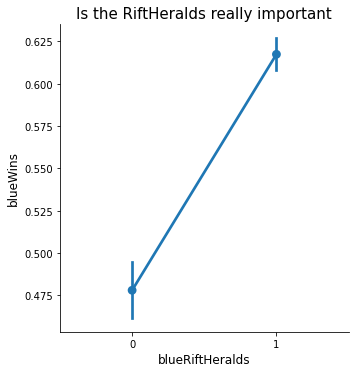

In [341]:
sns.factorplot(x = 'blueRiftHeralds', y = 'blueWins', data = lol_RiftHeralds_blue1)
plt.title('Is the RiftHeralds really important', fontsize = 15)
plt.xlabel('blueRiftHeralds', fontsize = 12)
plt.ylabel('blueWins', fontsize = 12)

# plt.savefig('블루 정령.jpg')

### Insight
* 양팀 모두 정령을 못먹을 때와 비교해 블루팀만 정령을 먹었을 때는 블루팀의 승리 확률이 급격히 올라간다

## 블루팀 정령 먹은 횟수에 따른 블루팀타워 철거 개수 간의 상관관계

Text(0, 0.5, 'blueTowerKills')

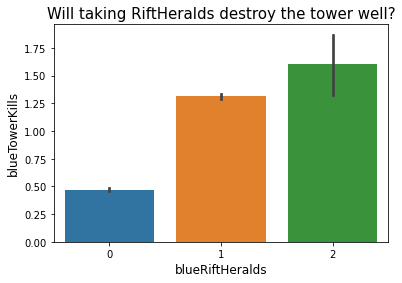

In [356]:
# 정령먹은 횟수가 증가할 수록 타워 철거 개수가 늘어난다.
# y축은 가중평균값임
sns.barplot(x = 'blueRiftHeralds', y = 'blueTowerKills', data = lol)

plt.title('Will taking RiftHeralds destroy the tower well?', fontsize = 15)
plt.xlabel('blueRiftHeralds', fontsize = 12)
plt.ylabel('blueTowerKills', fontsize = 12)


# plt.savefig('블루정령_타워.jpg')

Text(6.799999999999997, 0.5, 'blueTowerKills')

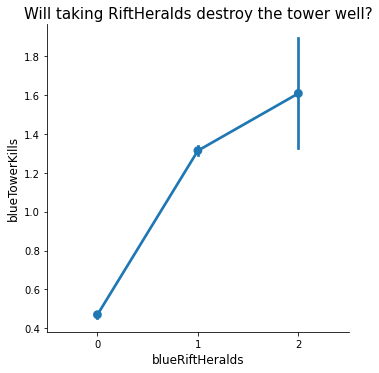

In [358]:
# 정령먹은 횟수가 증가할 수록 타워 철거 개수가 늘어난다.
# y축은 가중평균값임
sns.factorplot(x = 'blueRiftHeralds', y = 'blueTowerKills', data = lol)

plt.title('Will taking RiftHeralds destroy the tower well?', fontsize = 15)
plt.xlabel('blueRiftHeralds', fontsize = 12)
plt.ylabel('blueTowerKills', fontsize = 12)


# plt.savefig('블루정령_타워.jpg')

In [359]:
pd.crosstab(lol['blueTowerKills'], lol['blueRiftHeralds'], margins= True)

blueRiftHeralds,0,1,2,All
blueTowerKills,,,,
0,7985,3214,5,11204
1,3095,4760,18,7873
2,697,2487,14,3198
3,157,914,8,1079
4,45,318,1,364
5,35,181,0,216
6,25,119,0,144
7,9,51,0,60
8,12,13,0,25


In [360]:
(1*3095) + (2*697) + (3*157) + (4*45) + (5*35) + (6*25) + (7*9) + (8*12) + (9*4) + 10

5670

In [361]:
5670/12065

0.4699544135930377

### 블루팀 정령 먹은 횟수에 따른 블루팀 탑 타워 철거 개수 간의 상관관계

Text(6.799999999999997, 0.5, 'blueTopTowerKills')

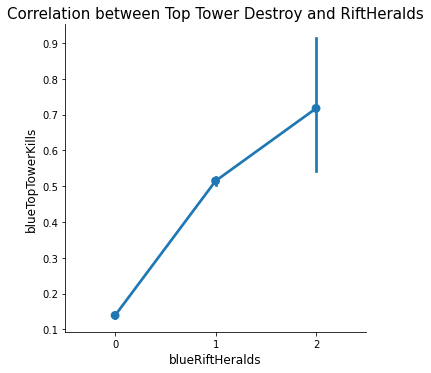

In [344]:
sns.factorplot(x = 'blueRiftHeralds', y = 'blueTopTowerKills', data = lol)

plt.title('Correlation between Top Tower Destroy and RiftHeralds', fontsize = 15)
plt.xlabel('blueRiftHeralds', fontsize = 12)
plt.ylabel('blueTopTowerKills', fontsize = 12)


In [363]:
pd.crosstab(lol['blueRiftHeralds'], lol['blueTopTowerKills'], margins= True)

blueTopTowerKills,0,1,2,3,All
blueRiftHeralds,,,,,
0,10485,1497,71,12,12065
1,6640,4686,679,54,12059
2,17,25,4,0,46
All,17142,6208,754,66,24170


In [365]:
(4686 + 679*2 + 54*3)/12059

0.514636371175056

### 블루팀 정령 먹은 횟수에 따른 블루팀 미드 타워 철거 개수 간의 상관관계

Text(6.799999999999997, 0.5, 'blueMidTowerKills')

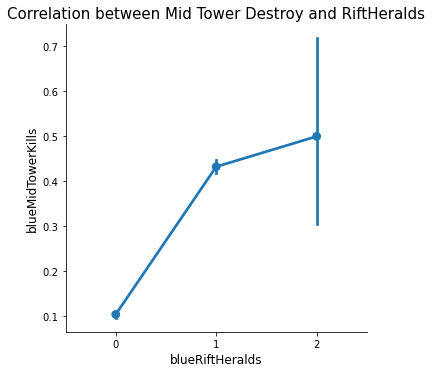

In [345]:
sns.factorplot(x = 'blueRiftHeralds', y = 'blueMidTowerKills', data = lol)

plt.title('Correlation between Mid Tower Destroy and RiftHeralds', fontsize = 15)
plt.xlabel('blueRiftHeralds', fontsize = 12)
plt.ylabel('blueMidTowerKills', fontsize = 12)


### 블루팀 정령 먹은 횟수에 따른 블루팀 봇 타워 철거 개수 간의 상관관계

Text(0.42499999999999716, 0.5, 'blueBotTowerKills')

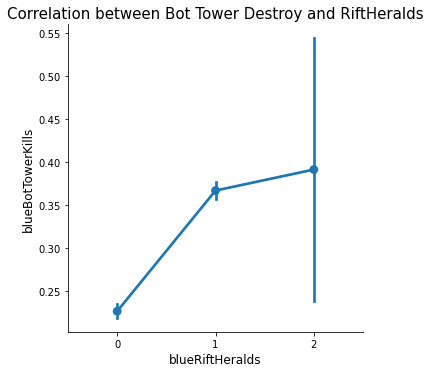

In [346]:
sns.factorplot(x = 'blueRiftHeralds', y = 'blueBotTowerKills', data = lol)

plt.title('Correlation between Bot Tower Destroy and RiftHeralds', fontsize = 15)
plt.xlabel('blueRiftHeralds', fontsize = 12)
plt.ylabel('blueBotTowerKills', fontsize = 12)


### Insight, 정령 섭취 횟수에 따른 각 라인별 타워 철거 개수 

* 블루팀의 정령 섭취 횟수에 따른 각 라인별 타워 철거개수를 파악해봤다.
* 탑라인의 철거 개수가 제일 높았고 봇라인에서 타워 철거 횟수가 낮았다.
* 게임 초반 15분에서는 블루팀이 정령을 먹으면 탑에 정령을 푸는 경향이 있다.

# 용 vs 정령

In [268]:
pd.crosstab([lol.blueDragon,lol.blueRiftHeralds], lol.blueWins)

blueWins                       0     1
blueDragon blueRiftHeralds            
0          0                4653  1375
           1                2839  2144
           2                   9     7
1          0                2337  2243
           1                1429  3283
           2                   7    12
2          0                 455  1002
           1                 349  2015
           2                   1    10

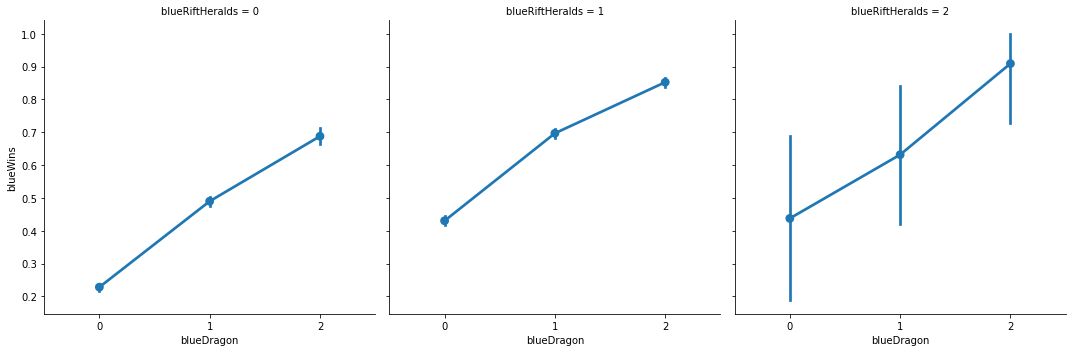

In [348]:
sns.factorplot('blueDragon', 'blueWins', col = 'blueRiftHeralds', data = lol)

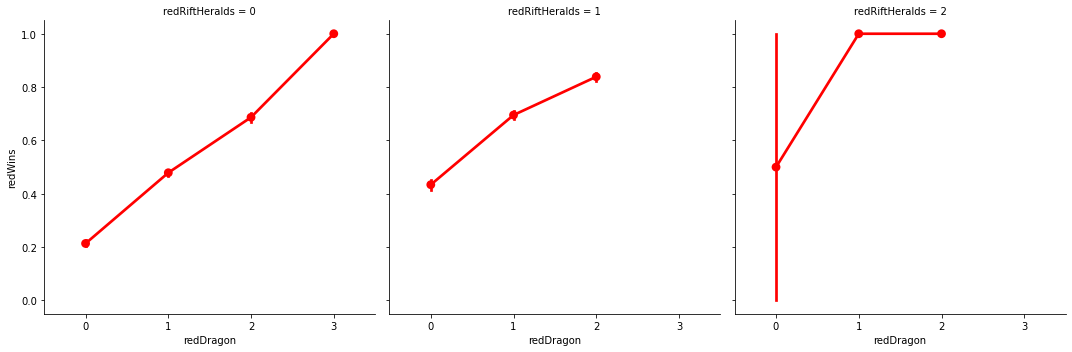

In [272]:
sns.factorplot('redDragon', 'redWins', col = 'redRiftHeralds', data = lol, color = 'red')

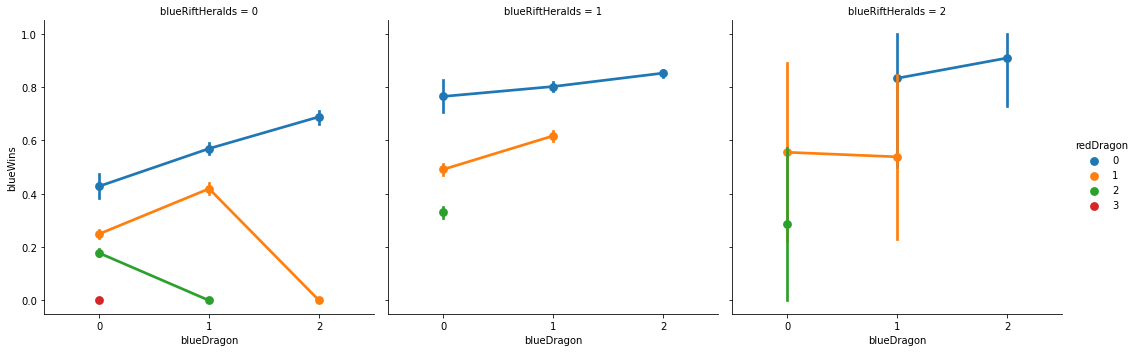

In [349]:
sns.factorplot('blueDragon', 'blueWins', hue = 'redDragon', col = 'blueRiftHeralds', data = lol)

# 와드 데이터

## 블루팀 와드설치 개수 분포

<AxesSubplot:xlabel='blueWardPlaced', ylabel='Count'>

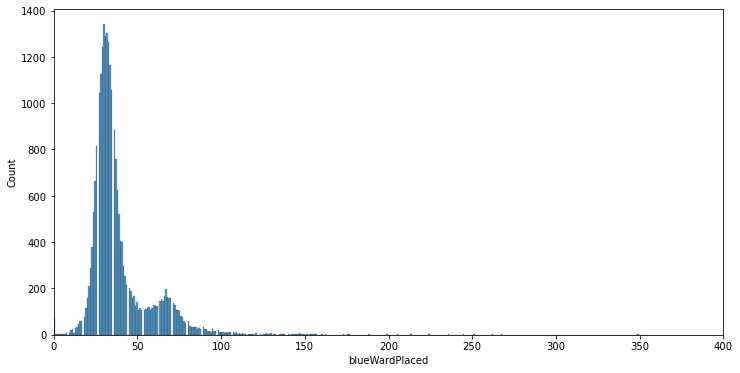

In [86]:
# 블루팀의 와드설치 개수는 대부분 100이하입니다.
# 와드설치개수가 100을 넘어가는 게임판수는 드물게 1~2판만 존재합니다.

plt.figure(figsize=(12,6))
plt.xlim(0, 400)

sns.histplot(lol['blueWardPlaced'])

In [91]:
# 인덱스는  초반 15분에서 와드를 설치한 개수
# 값은 게임 초반 15분에서 인덱스 값만큼 와드를 설치한 게임의 판수
lol['blueWardPlaced'].value_counts()

30     1341
32     1301
31     1288
33     1262
29     1241
       ... 
210       1
221       1
179       1
269       1
180       1
Name: blueWardPlaced, Length: 222, dtype: int64

In [92]:
lol['blueWardPlaced'].value_counts().sort_index().tail(20)

238    1
240    1
241    1
242    1
245    2
246    1
251    2
257    1
262    2
266    1
267    2
269    1
276    1
277    1
291    1
295    1
304    1
316    1
349    2
355    1
Name: blueWardPlaced, dtype: int64

## 레드팀 와드설치 개수 분포

<AxesSubplot:xlabel='blueWardPlaced', ylabel='Count'>

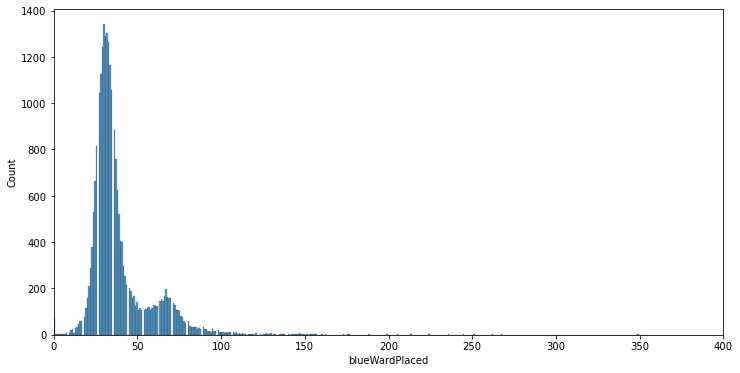

In [114]:
# 레드팀의 와드설치 개수는 대부분 100이하입니다.
# 와드설치개수가 100을 넘어가는 게임판수는 드물게 1~2판만 존재합니다.
plt.figure(figsize=(12,6))
plt.xlim(0, 400)

sns.histplot(lol['blueWardPlaced'])

In [112]:
# 인덱스는  초반 15분에서 와드를 설치한 개수
# 값은 게임 초반 15분에서 인덱스 값만큼 와드를 설치한 게임의 판수
lol['redWardPlaced'].value_counts()

31     1210
32     1153
33     1148
30     1147
34     1101
       ... 
247       1
305       1
292       1
379       1
186       1
Name: redWardPlaced, Length: 233, dtype: int64

In [113]:
# 블루팀의 와드설치 개수 1506개 같은 이상치는 존재하지 않습니다.
lol['redWardPlaced'].value_counts().sort_index().tail(20)

269    1
273    1
279    1
281    1
282    1
286    1
289    1
291    1
292    1
295    1
297    1
301    1
303    2
305    1
328    1
334    1
336    1
340    1
349    1
379    1
Name: redWardPlaced, dtype: int64

## 블루팀 정령 섭취 횟수에 따른 와드 설치 갯수

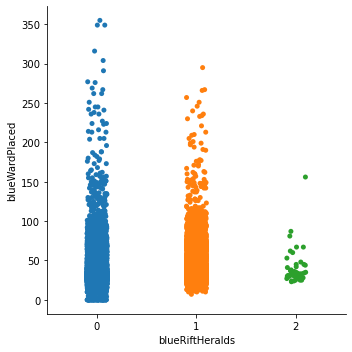

In [90]:
sns.catplot(x = 'blueRiftHeralds', y = 'blueWardPlaced', data = lol)

## 블루팀 용 섭취 횟수에 따른 와드 설치 갯수

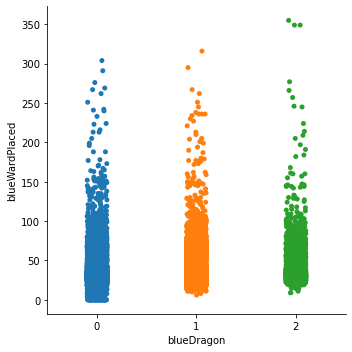

In [108]:
sns.catplot(x = 'blueDragon', y = 'blueWardPlaced', data = lol)

## 블루팀 용 및 정령 섭취 횟수에 따른 와드 설치 개수

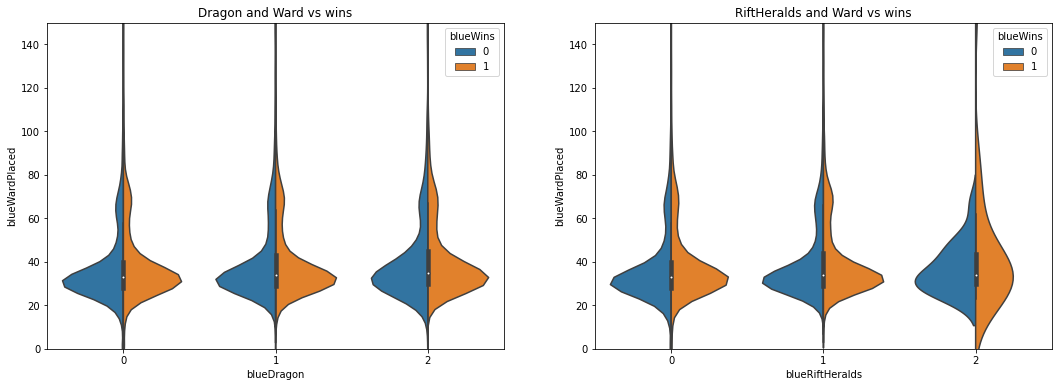

In [107]:
fig, axs = plt.subplots(1, 2, figsize = (18,6))

axs[0].set_ylim(0, 150)
axs[1].set_ylim(0, 150)

axs[0].set_title('Dragon and Ward vs wins')
axs[1].set_title('RiftHeralds and Ward vs wins')

sns.violinplot(x = 'blueDragon', y = 'blueWardPlaced', hue = 'blueWins', split = True, data = lol, ax =axs[0])
sns.violinplot(x = 'blueRiftHeralds', y = 'blueWardPlaced', hue = 'blueWins', split = True, data = lol, ax = axs[1])

plt.show()

## 블루팀 와드 파괴수와 레드팀 와드 설치수 간의 상관관계

<AxesSubplot:xlabel='blueWardKills', ylabel='redWardPlaced'>

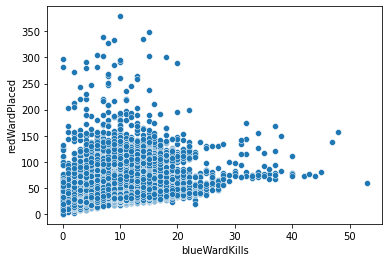

In [109]:
sns.scatterplot(x = 'blueWardKills', y = 'redWardPlaced', data = lol)

## 블루팀 와드 설치수와 레드팀 와드 설치수 간의 상관관계

<AxesSubplot:xlabel='blueWardPlaced', ylabel='redWardPlaced'>

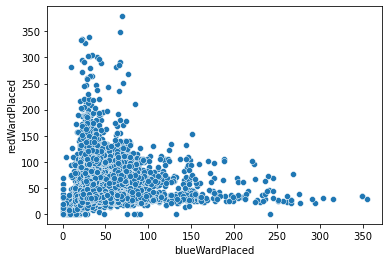

In [110]:
sns.scatterplot(x = 'blueWardPlaced', y = 'redWardPlaced', data = lol)

## 블루팀 와드 파괴수와 레드팀 와드 파괴수 간의 상관관계

<AxesSubplot:xlabel='blueWardKills', ylabel='redWardKills'>

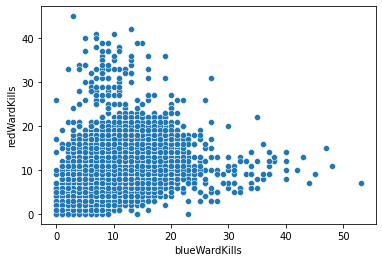

In [111]:
sns.scatterplot(x = 'blueWardKills', y = 'redWardKills', data = lol)

## 블루팀 와드설치 개수와 정글몹 처치 개수간의 상관관계

<AxesSubplot:xlabel='blueWardPlaced', ylabel='blueTotalJungleMinionKills'>

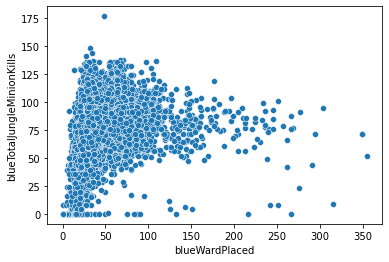

In [115]:
sns.scatterplot(x = 'blueWardPlaced', y = 'blueTotalJungleMinionKills', data = lol)

## 블루팀 와드설치 개수와 블루팀 킬뎃간의 상관관계

<AxesSubplot:xlabel='blueWardPlaced', ylabel='blueDeath'>

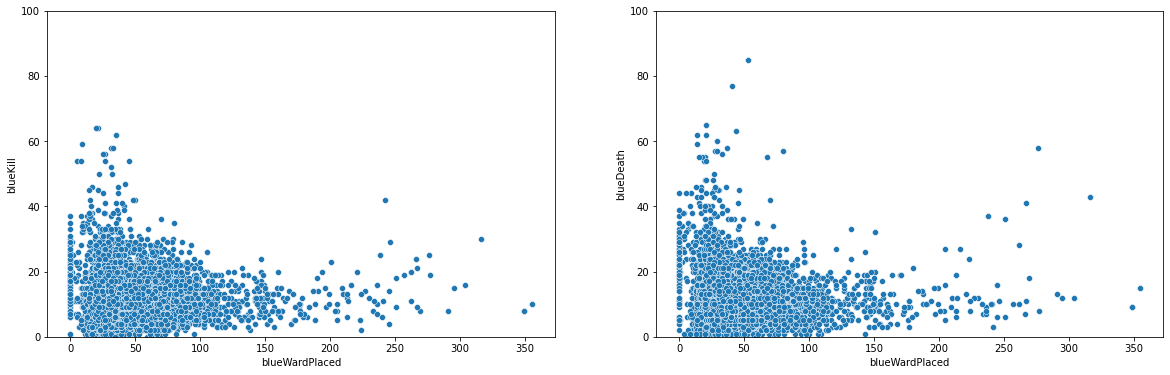

In [123]:
fig, axs = plt.subplots(1, 2, figsize = (20,6))

axs[0].set_ylim(0, 100)
axs[1].set_ylim(0, 100)

sns.scatterplot(x = 'blueWardPlaced', y = 'blueKill', data = lol, ax = axs[0])
sns.scatterplot(x = 'blueWardPlaced', y = 'blueDeath', data = lol, ax = axs[1])

# KDA 데이터

## KDA 분포도

<AxesSubplot:xlabel='redDeath', ylabel='Count'>

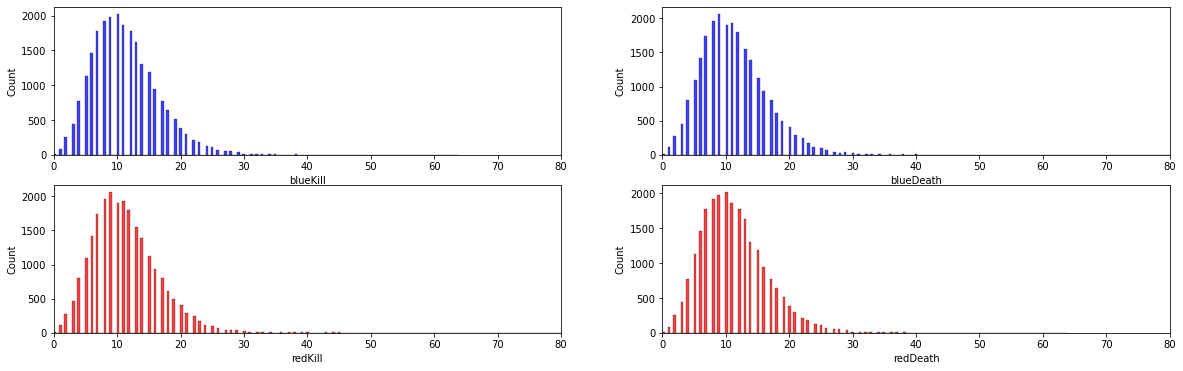

In [143]:
fig, axs = plt.subplots(2, 2, figsize = (20,6))

axs[0][0].set_xlim(0, 80)
axs[0][1].set_xlim(0, 80)
axs[1][0].set_xlim(0, 80)
axs[1][1].set_xlim(0, 80)

# axs[0].set_title('Kill : blue vs red')
# axs[1].set_title('Death : blue vs red')

sns.histplot(lol['blueKill'], ax = axs[0][0], color = 'blue')
sns.histplot(lol['blueDeath'], ax = axs[0][1], color = 'blue')


sns.histplot(lol['redKill'], ax = axs[1][0], color = 'red')
sns.histplot(lol['redDeath'], ax = axs[1][1], color = 'red')

## KDA 기초통계량

In [137]:
lol[['blueKill', 'blueDeath', 'blueAssist', 'redKill', 'redDeath', 'redAssist']].describe()

,blueKill,blueDeath,blueAssist,redKill,redDeath,redAssist
count,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000,24170.000000
mean,11.298759,11.300786,14.073604,11.300786,11.298759,14.057551
std,5.341689,5.495940,7.850347,5.495940,5.341689,8.136072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,9.000000,8.000000,8.000000,9.000000
50%,11.000000,11.000000,13.000000,11.000000,11.000000,13.000000
75%,14.000000,14.000000,18.000000,14.000000,14.000000,18.000000
max,64.000000,85.000000,110.000000,85.000000,64.000000,116.000000


## 승패에 따른 킬뎃 KDE그래프

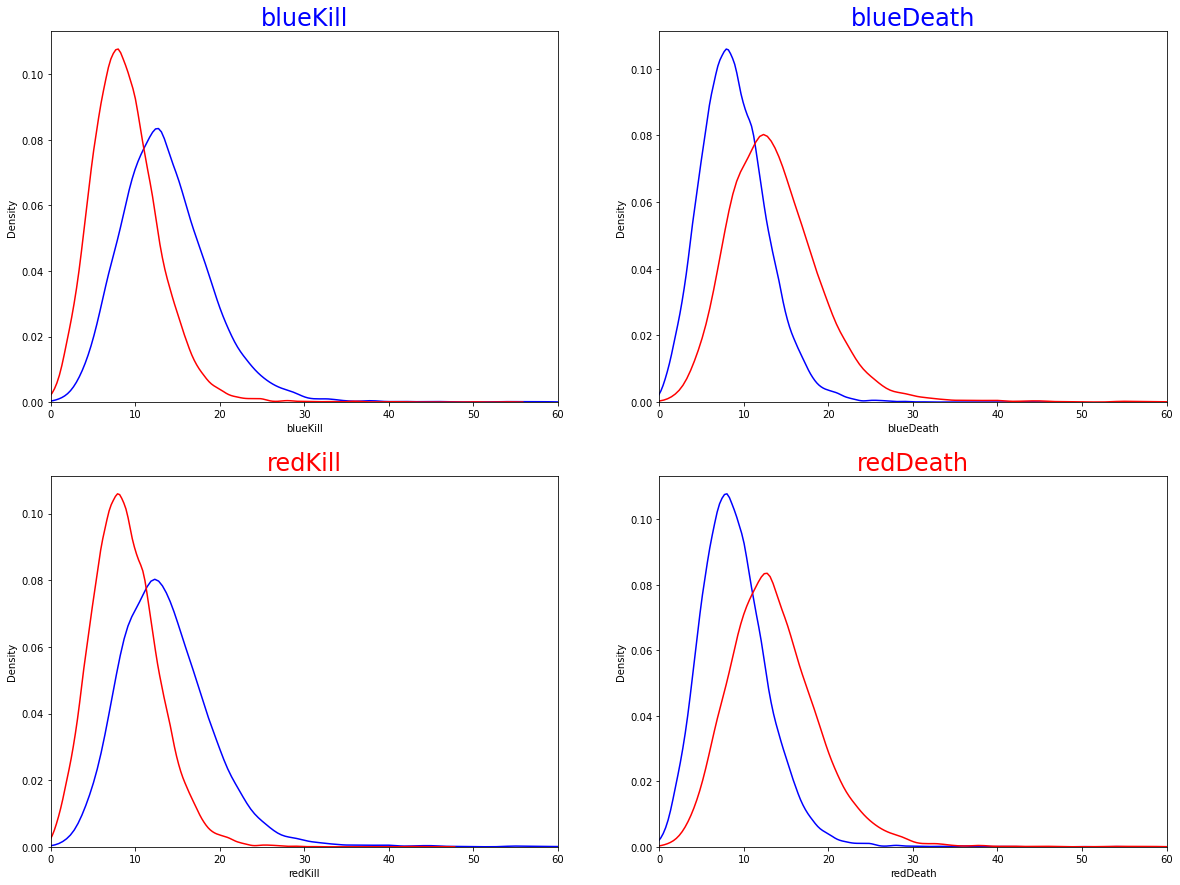

In [178]:
# 파란색은 이겼을 때, 빨간색은 졌을 때 그래프입니다.

fig, axs = plt.subplots(2, 2, figsize = (20, 15))

axs[0][0].set_xlim(0, 60)
axs[0][1].set_xlim(0, 60)
axs[1][0].set_xlim(0, 60)
axs[1][1].set_xlim(0, 60)

axs[0][0].set_title('blueKill', fontsize = 24, color = 'blue')
axs[0][1].set_title('blueDeath', fontsize = 24, color = 'blue')
axs[1][0].set_title('redKill', fontsize = 24, color = 'red')
axs[1][1].set_title('redDeath', fontsize = 24, color = 'red')

# axs[0][0].legend()
# axs[0][1].legend()
# axs[1][0].legend()
# axs[1][1].legend()

sns.kdeplot(lol.loc[lol['blueWins'] == 1, 'blueKill'], label = 'Win', ax = axs[0][0], color = 'blue')
sns.kdeplot(lol.loc[lol['blueWins'] == 0, 'blueKill'], label = 'lose', ax = axs[0][0], color = 'red')

sns.kdeplot(lol.loc[lol['blueWins'] == 1, 'blueDeath'], label = 'Win', ax = axs[0][1], color = 'blue')
sns.kdeplot(lol.loc[lol['blueWins'] == 0, 'blueDeath'], label = 'lose', ax = axs[0][1], color = 'red')

sns.kdeplot(lol.loc[lol['redWins'] == 1, 'redKill'], label = 'Win', ax = axs[1][0], color = 'blue')
sns.kdeplot(lol.loc[lol['redWins'] == 0, 'redKill'], label = 'lose', ax = axs[1][0], color = 'red')

sns.kdeplot(lol.loc[lol['redWins'] == 1, 'redDeath'], label = 'Win', ax = axs[1][1], color = 'blue')
sns.kdeplot(lol.loc[lol['redWins'] == 0, 'redDeath'], label = 'lose', ax = axs[1][1], color = 'red')

plt.show()

# 타워 및 억제기 데이터

## 블루팀이 첫 타워를 깼을 때 승리 확률

Text(0.42499999999999716, 0.5, 'blueWins')

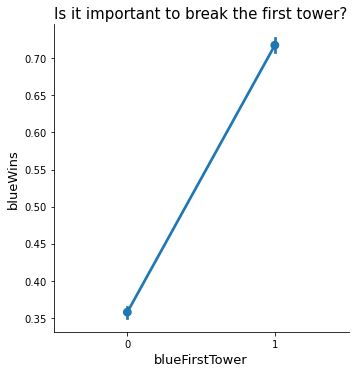

In [350]:
sns.factorplot(x = 'blueFirstTower', y = 'blueWins', data = lol)

plt.title("Is it important to break the first tower?", fontsize = 15)
plt.xlabel('blueFirstTower', fontsize= 13)
plt.ylabel('blueWins', fontsize= 13)


In [262]:
pd.crosstab(index = lol['blueFirstTower'], columns = lol['blueWins'])

blueWins,0,1
blueFirstTower,,
0,9376,5219
1,2703,6872


## 블루팀이 억제기를 먼저 깼을 때 승리확률

Text(6.799999999999997, 0.5, 'blueWins')

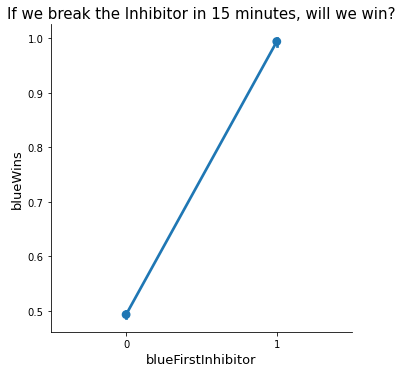

In [351]:
# 15분안에 억제기를 깨면 거의 이긴다.
sns.factorplot(x = 'blueFirstInhibitor', y = 'blueWins', data = lol)

plt.title("If we break the Inhibitor in 15 minutes, will we win?", fontsize = 15)
plt.xlabel('blueFirstInhibitor', fontsize= 13)
plt.ylabel('blueWins', fontsize= 13)

In [261]:
# 블루팀이 15분안에 첫 억제기를 깨고 진 게임은 366판 중 2판 뿐이다.
pd.crosstab(index = lol['blueFirstInhibitor'], columns = lol['blueWins'])

blueWins,0,1
blueFirstInhibitor,,
0,12077,11747
1,2,344


## 어느라인이 잘커야 게임에서 승리할 수 있을까
* 어느라인 타워를 먼저 깨야 게임에서 승리할 수 있을까

In [214]:
# 블루팀이 첫 타워를 부신 경기중에서 첫타워를 부순 라인별 승리확률을 파악합니다.
# 블루팀이 첫 타워를 부슨 경기만 lol_blueFirstTower에 담습니다. 
lol_blueFirstTower = lol[lol['blueFirstTowerLane'] != '[]']
lol_blueFirstTower

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,str_blueWins,str_blueFirstDragon
5,1,28396,3293,45,9.0,357,86,0,12,12,...,0,0,1,0,1,['EARTH_DRAGON'],1,0,win,not_FirstDragon
6,0,24187,3547,43,8.6,345,80,0,5,8,...,0,0,0,0,1,"['EARTH_DRAGON', 'FIRE_DRAGON']",2,0,lose,not_FirstDragon
7,1,29686,3926,46,9.2,386,85,0,14,12,...,0,1,0,0,1,['AIR_DRAGON'],1,1,win,not_FirstDragon
9,1,29116,7604,51,10.2,383,84,0,14,9,...,0,0,0,0,0,[],0,0,win,FirstDragon
11,1,33405,6080,51,10.2,421,109,0,16,6,...,0,1,0,0,0,[],0,0,win,FirstDragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26815,1,43541,10213,52,10.4,274,24,0,54,10,...,0,1,0,1,0,[],0,0,win,FirstDragon
26819,1,28922,2587,47,9.4,336,80,0,15,13,...,0,0,0,0,0,['EARTH_DRAGON'],1,0,win,FirstDragon
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,0,0,0,0,0,[],0,1,win,FirstDragon
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,0,0,0,0,0,[],0,0,lose,not_FirstDragon


Text(0.42499999999999716, 0.5, 'blueWins')

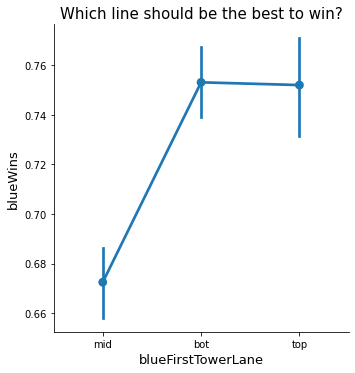

In [352]:
sns.factorplot(x = 'blueFirstTowerLane', y = 'blueWins', data = lol_blueFirstTower)

plt.title("Which line should be the best to win?", fontsize = 15)
plt.xlabel('blueFirstTowerLane', fontsize= 13)
plt.ylabel('blueWins', fontsize= 13)

### Insight 
* 첫타워를 부술 거면 미드보다는 탑이나 봇 타워를 깨자
* 첫타워로 봇이나 탑이 부셔졌다는 뜻은 봇이나 탑이 잘 컸다는 것을 의미
* 첫 타워를 미드로 밀었다는 뜻은 합류 이후에 한타에서 이기고 기세를 몰아서 부쉈을 가능성이 큼
* 양쪽이 비등한 것 보다는 봇이나 탑이 잘 컸을 때의 승리확률이 크다는 의미?

## 어느 라인 타워를 깨야 억제기를 빨리 깰수 있을까
* 블루팀이 첫 타워를 깬 가정
* 블루팀이 첫 타워를 어느라인으로 깨야 억제기를 레드팀보다 억제기를 먼저 깰 수 있을 까

In [287]:
lol['blueFirstTowerLane'].value_counts()

[]     14595
mid     4180
bot     3536
top     1859
Name: blueFirstTowerLane, dtype: int64

In [289]:
lol['blueFirstTower'].value_counts()

0    14595
1     9575
Name: blueFirstTower, dtype: int64

In [290]:
# 위에서 생성한 블루팀이 첫 타워를 부순 경기만 담아옵니다.
lol_blueFirstTower

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,str_blueWins,str_blueFirstDragon
5,1,28396,3293,45,9.0,357,86,0,12,12,...,0,0,1,0,1,['EARTH_DRAGON'],1,0,win,not_FirstDragon
6,0,24187,3547,43,8.6,345,80,0,5,8,...,0,0,0,0,1,"['EARTH_DRAGON', 'FIRE_DRAGON']",2,0,lose,not_FirstDragon
7,1,29686,3926,46,9.2,386,85,0,14,12,...,0,1,0,0,1,['AIR_DRAGON'],1,1,win,not_FirstDragon
9,1,29116,7604,51,10.2,383,84,0,14,9,...,0,0,0,0,0,[],0,0,win,FirstDragon
11,1,33405,6080,51,10.2,421,109,0,16,6,...,0,1,0,0,0,[],0,0,win,FirstDragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26815,1,43541,10213,52,10.4,274,24,0,54,10,...,0,1,0,1,0,[],0,0,win,FirstDragon
26819,1,28922,2587,47,9.4,336,80,0,15,13,...,0,0,0,0,0,['EARTH_DRAGON'],1,0,win,FirstDragon
26828,1,31534,3156,49,9.8,403,96,0,17,14,...,0,0,0,0,0,[],0,1,win,FirstDragon
26831,0,26091,2986,47,9.4,338,86,0,7,6,...,0,0,0,0,0,[],0,0,lose,not_FirstDragon


Text(-5.950000000000003, 0.5, 'blueFirstInhibitor')

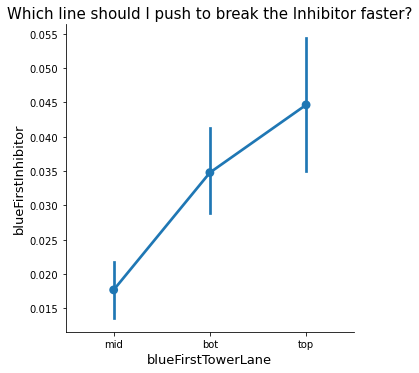

In [353]:
sns.factorplot(x = 'blueFirstTowerLane', y = 'blueFirstInhibitor', data = lol_blueFirstTower)

plt.title("Which line should I push to break the Inhibitor faster?", fontsize = 15)
plt.xlabel('blueFirstTowerLane', fontsize= 13)
plt.ylabel('blueFirstInhibitor', fontsize= 13)

### Insight
* 탑은 롤이라는 게임에서 전체적으로 따로 노는 경향이 있음
* 탑이 먼저 타워를 깼다는 것은 그만큼 탑이 잘 컸다는 뜻임